<H1> IAD LAB 1 </H1>
<h2>Умова:</h2>

11. Дано масив  $T = \{(t_{i}) | t_{i} = (x_{i1}, x_{i2}, ..., x_{im}), i=1, ..., N\}, x_{ij}\in R $, де приклад $t_{i}$ характеризується <i>m</i> ознаками. Задано кількість кластерів $2\leq g \leq N$. Розрахувати центри кластерів за формулою:
$$c_{i}={\sum_{i=1}^N u_{ki}t_{i} \over \sum_{i=1}^N u_{ki}}, k=1,...,g,$$<br>
    де $U=\{(u_{ki})|k=1,...,g,i=1,...,g\}$ - випадковим чином задана матриця початкового розбиття, $u_{ki}\in \{0,1\}, \sum_{k=1}^g u_{ki}=1, \sum_{i=1}^N u_{ki}<N$.<br><br>
    Перерахувати матрицю розбиття:<br>
    $u_{ki}=1$ якщо $d(t_{i},c_{k}) = min_{l=1,...,g}d(t_{i},c_{l})$,<br>
    $u_{ki}=0$ в іншому випадку,<br>
    за умови, що $d(t_{i},c_{k})$ - евклідова відстань між векторами.<br>
    Виконати декілька ітерацій з уточнення центрів кластерів.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

In [31]:
g = 5  #Количество кластеров
m = 20 #Количество признаков 
N = 350 #Количество примеров

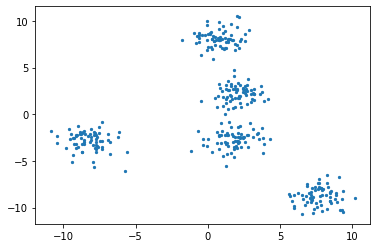

In [32]:
# Размерности кластеров, которые отобразим на графике для проверки качества нахождения центров
dim1 = np.random.randint(0, m)
dim2 = np.random.randint(0, m)
while (dim2 == dim1):
    dim2 = np.random.randint(0, m)

# Инициация примеров по отдаленным кластерам
T, y = make_blobs(n_samples=N, centers=g, n_features=m, random_state=42) 

# 2D графическое представление расположения кластеров
plt.scatter(T[:, dim1], T[:, dim2], s=5)

In [33]:
#Инициализация начальных матриц
u = np.zeros((g, N))
c = np.zeros((g, m))

for _ in range(N):
    u[np.random.randint(0, g),_] = 1

for k in range(g):
    c[k] = (u[k].dot(T))/sum(u[k])

#Итеративное уточнение значений кластеров
iter_num = 100
for iters in range(iter_num):
    mm = []
    for i in range(N):
        m = np.argmin([np.linalg.norm(T[i] - c[k]) for k in range(g)])
        mm.append(m)
        for _ in range(g):
            u[_, i] = 0
        
        u[m, i] = 1
        for _ in u:
            if sum(_) == 0:
                _[np.random.randint(0, g)] = 1 # Сглаживание на случай, если начальный спавн центров дает нули после итерации
    
    for k in range(g):
        c[k] = (u[k].dot(T))/sum(u[k])
    #print(c)







# Plot

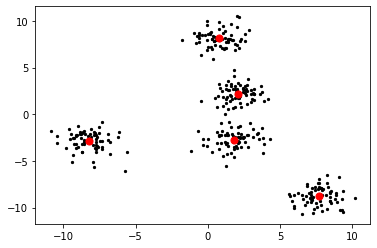

In [36]:
plt.scatter(T[:, dim1], T[:, dim2], s=5, color = "black")
plt.scatter(c[:, dim1], c[:, dim2], s=50, color="red")